# Eksperimen 2 tanpa tambahan feature baru (REVISI)

**PENJELASAN TIAP KOLOM**

1	months_as_customer:	Lama pelanggan menjadi nasabah (dalam bulan). Bisa menunjukkan loyalitas.

2	age:	Usia tertanggung. Mungkin memengaruhi risiko klaim.

3	policy_number: Nomor polis unik. Tidak mengandung informasi prediktif langsung.

4	policy_bind_date: Tanggal polis dimulai atau diaktifkan.
5	policy_state:	Negara bagian tempat polis diterbitkan.

6	policy_csl:	CSL: Combined Single Limit, batas klaim untuk cedera dan kerusakan properti.

7	policy_deductable:	Jumlah yang harus dibayar nasabah sebelum klaim dibayarkan oleh perusahaan.

8	policy_annual_premium:	Premi tahunan yang dibayar nasabah. Bisa terkait besar kecilnya klaim.

9	umbrella_limit:	Limit tambahan dari polis utama. Nilai lebih tinggi = proteksi lebih besar.

10	insured_zip:	Kode pos tertanggung. Bisa diasosiasikan dengan lokasi risiko.
11	insured_sex:	Jenis kelamin tertanggung.

12	insured_education_level:	Tingkat pendidikan tertanggung. Bisa berhubungan dengan karakteristik risiko.

13	insured_occupation:	Pekerjaan tertanggung. Profesi tertentu mungkin lebih berisiko.

14	insured_hobbies:	Hobi tertanggung. Bisa digunakan untuk analisis risiko personal.

15	insured_relationship:	Status hubungan antara tertanggung dan pemegang polis.

16	capital-gains:	Keuntungan modal dari sumber lain.

17	capital-loss:	Kerugian modal dari sumber lain.

18	incident_date:	Tanggal kejadian insiden.

19	incident_type: Jenis kejadian: misalnya Theft, Collision, dll.

20	collision_type:	Jenis tabrakan (Front, Side, Rear). Bisa menunjukkan jenis kerusakan.

21	authorities_contacted:	Apakah pihak berwenang (polisi/dll) dihubungi saat insiden. (ada missing)

22	incident_state:	Lokasi negara bagian tempat insiden terjadi.

23	incident_city:	Kota tempat insiden terjadi.

24	incident_location:	Alamat spesifik lokasi kejadian.

25	incident_hour_of_the_day:	Jam terjadinya insiden (0–23).

26	number_of_vehicles_involved:	Jumlah kendaraan yang terlibat dalam insiden.

27	property_damage:	Apakah properti lain rusak dalam insiden (Yes/No/?).

28	bodily_injuries:	Jumlah orang yang mengalami cedera tubuh.

29	witnesses:	Jumlah saksi mata. Bisa meningkatkan validitas klaim.

30	police_report_available:	Apakah laporan polisi tersedia (Yes/No/?).

31	total_claim_amount:	Total nilai klaim (gabungan seluruh komponen).

32	injury_claim:	Klaim untuk cedera tubuh. Subkomponen dari total_claim_amount.

33	property_claim:	Klaim untuk kerusakan properti.

34	vehicle_claim:	Klaim untuk kendaraan.

35	auto_make:	Merek mobil yang diasuransikan.

36	auto_model:	Model mobil.

37	auto_year:	Tahun pembuatan mobil.

38	fraud_reported:	Label target: Apakah klaim ini fraud? (Y/N) → variabel dependen


In [ ]:
import numpy as np
import pandas as pd
import gdown

import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import roc_auc_score, average_precision_score, recall_score, precision_score, \
                            f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import data
file_id = '1obssJCyOTyjzorhykQ1pisGwJIv8BFVI'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'claim insurances fraud.csv', quiet=False)

df = pd.read_csv('claim insurances fraud.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1obssJCyOTyjzorhykQ1pisGwJIv8BFVI
To: /content/claim insurances fraud.csv
100%|██████████| 266k/266k [00:00<00:00, 9.83MB/s]


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
df.shape

(1000, 39)

#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


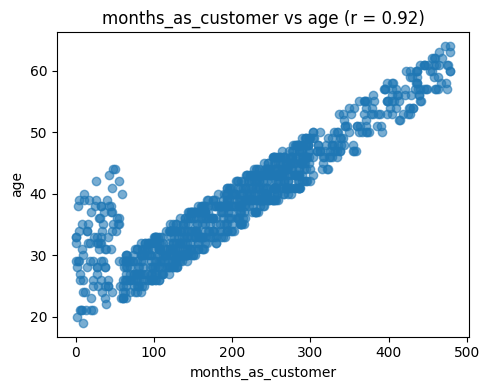

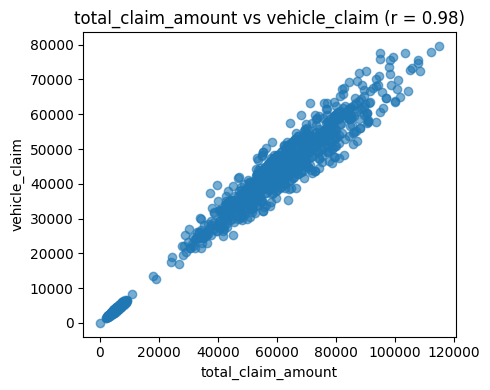

In [ ]:
# Ambil hanya fitur numerik (EXCLUDE target kalau ada)
target_col = "fraud_reported"  # ganti sesuai nama target
df_num = df.drop(columns=[target_col], errors="ignore") \
           .select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = df_num.corr(method="pearson")

# Threshold multikolinearitas
threshold = 0.9

# Ambil pasangan fitur unik (upper triangle)
high_mc = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

high_mc.columns = ["feature_1", "feature_2", "pearson_r"]

# Filter multikolinearitas tinggi
high_mc = high_mc[high_mc["pearson_r"].abs() > threshold]

high_mc
for _, row in high_mc.iterrows():
    f1, f2, r = row["feature_1"], row["feature_2"], row["pearson_r"]

    plt.figure(figsize=(5, 4))
    plt.scatter(df_num[f1], df_num[f2], alpha=0.6)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f"{f1} vs {f2} (r = {r:.2f})")
    plt.tight_layout()
    plt.show()


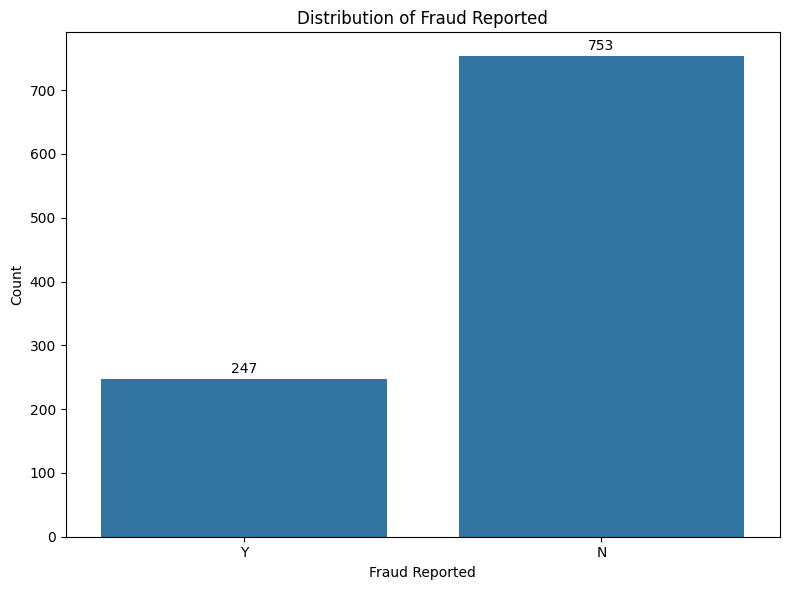

In [ ]:
# distribusi fitur target

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fraud_reported', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{height:.0f}', ha='center', va='bottom')

plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

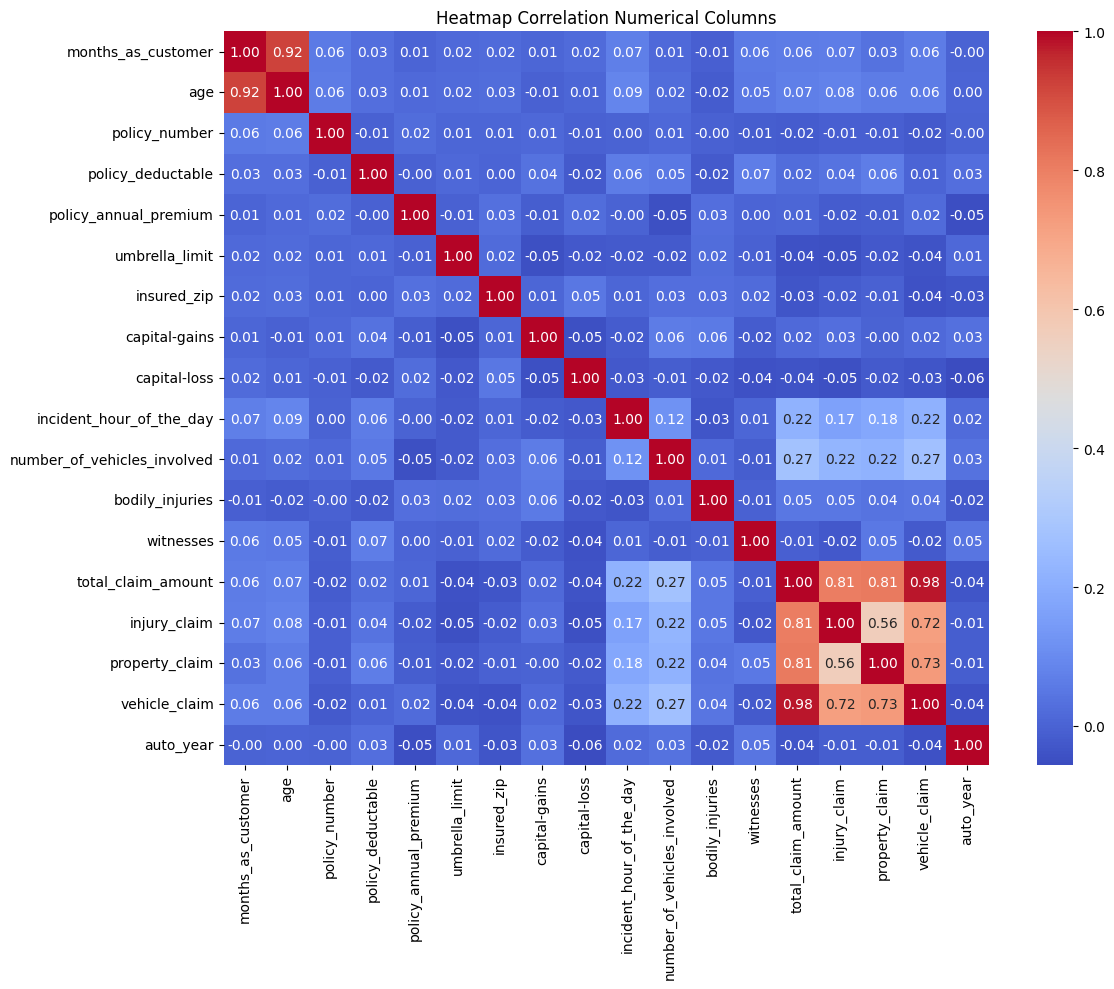

In [ ]:
# heatmap untuk numerikal kolom nya

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df_numerical = df[numerical_cols]

plt.figure(figsize=(12, 10))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Numerical Columns')
plt.tight_layout()
plt.show()

In [ ]:
df[['insured_education_level', 'incident_severity', 'umbrella_limit', 'policy_deductable', 'property_damage', 'fraud_reported']]

,insured_education_level,incident_severity,umbrella_limit,policy_deductable,property_damage,fraud_reported
0,MD,Major Damage,0,1000,YES,Y
1,MD,Minor Damage,5000000,2000,?,Y
2,PhD,Minor Damage,5000000,2000,NO,N
3,PhD,Major Damage,6000000,2000,?,Y
4,Associate,Minor Damage,6000000,1000,NO,N
...,...,...,...,...,...,...
995,Masters,Minor Damage,0,1000,YES,N
996,PhD,Major Damage,0,1000,YES,N
997,Masters,Minor Damage,3000000,500,?,N
998,Associate,Major Damage,5000000,2000,?,N


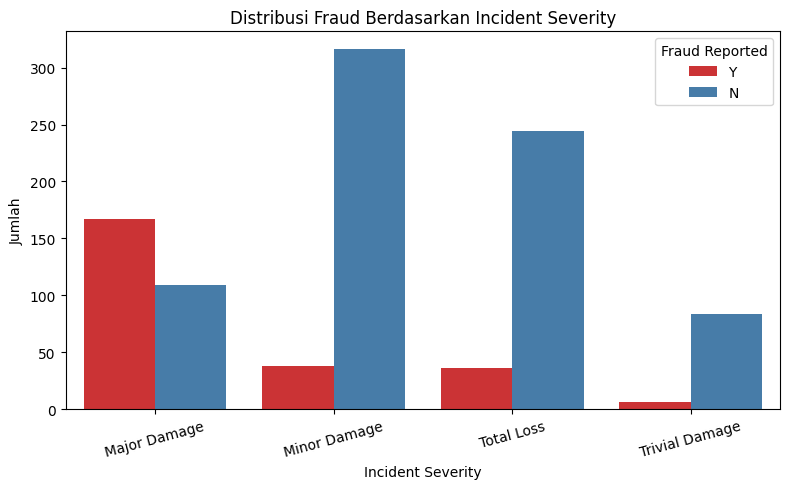

In [ ]:
# unstacked bar chart untuk distribusi fraud berdasarkan incident severity
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='incident_severity', hue='fraud_reported', palette='Set1')
plt.title('Distribusi Fraud Berdasarkan Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Jumlah')
plt.legend(title='Fraud Reported')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [ ]:
# Jumlah dan persentase missing value pada kolom authorities contacted
missing_info = df['authorities_contacted'].isnull().sum()
missing_percent = (missing_info / len(df)) * 100

print(f"Jumlah missing pada 'authorities_contacted': {missing_info}")
print(f"Persentase missing: {missing_percent:.2f}%")

Jumlah missing pada 'authorities_contacted': 91
Persentase missing: 9.10%


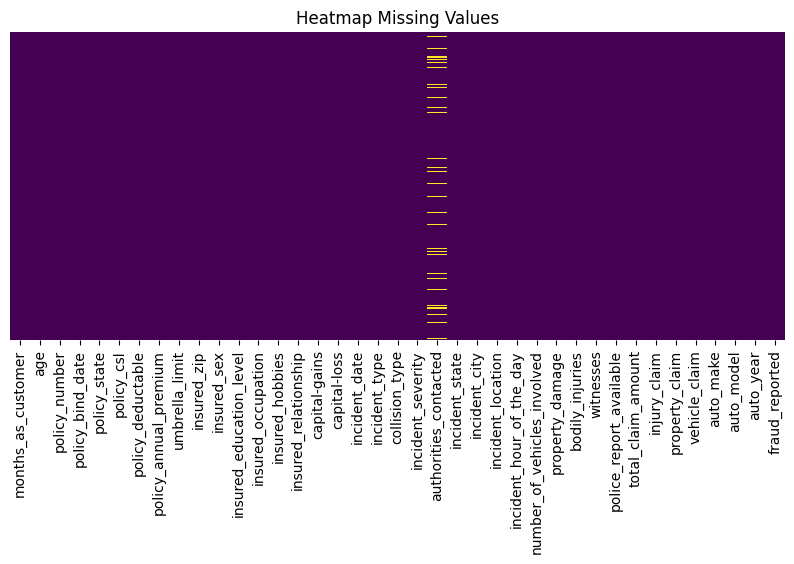

In [ ]:
# Heatmap missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.show()

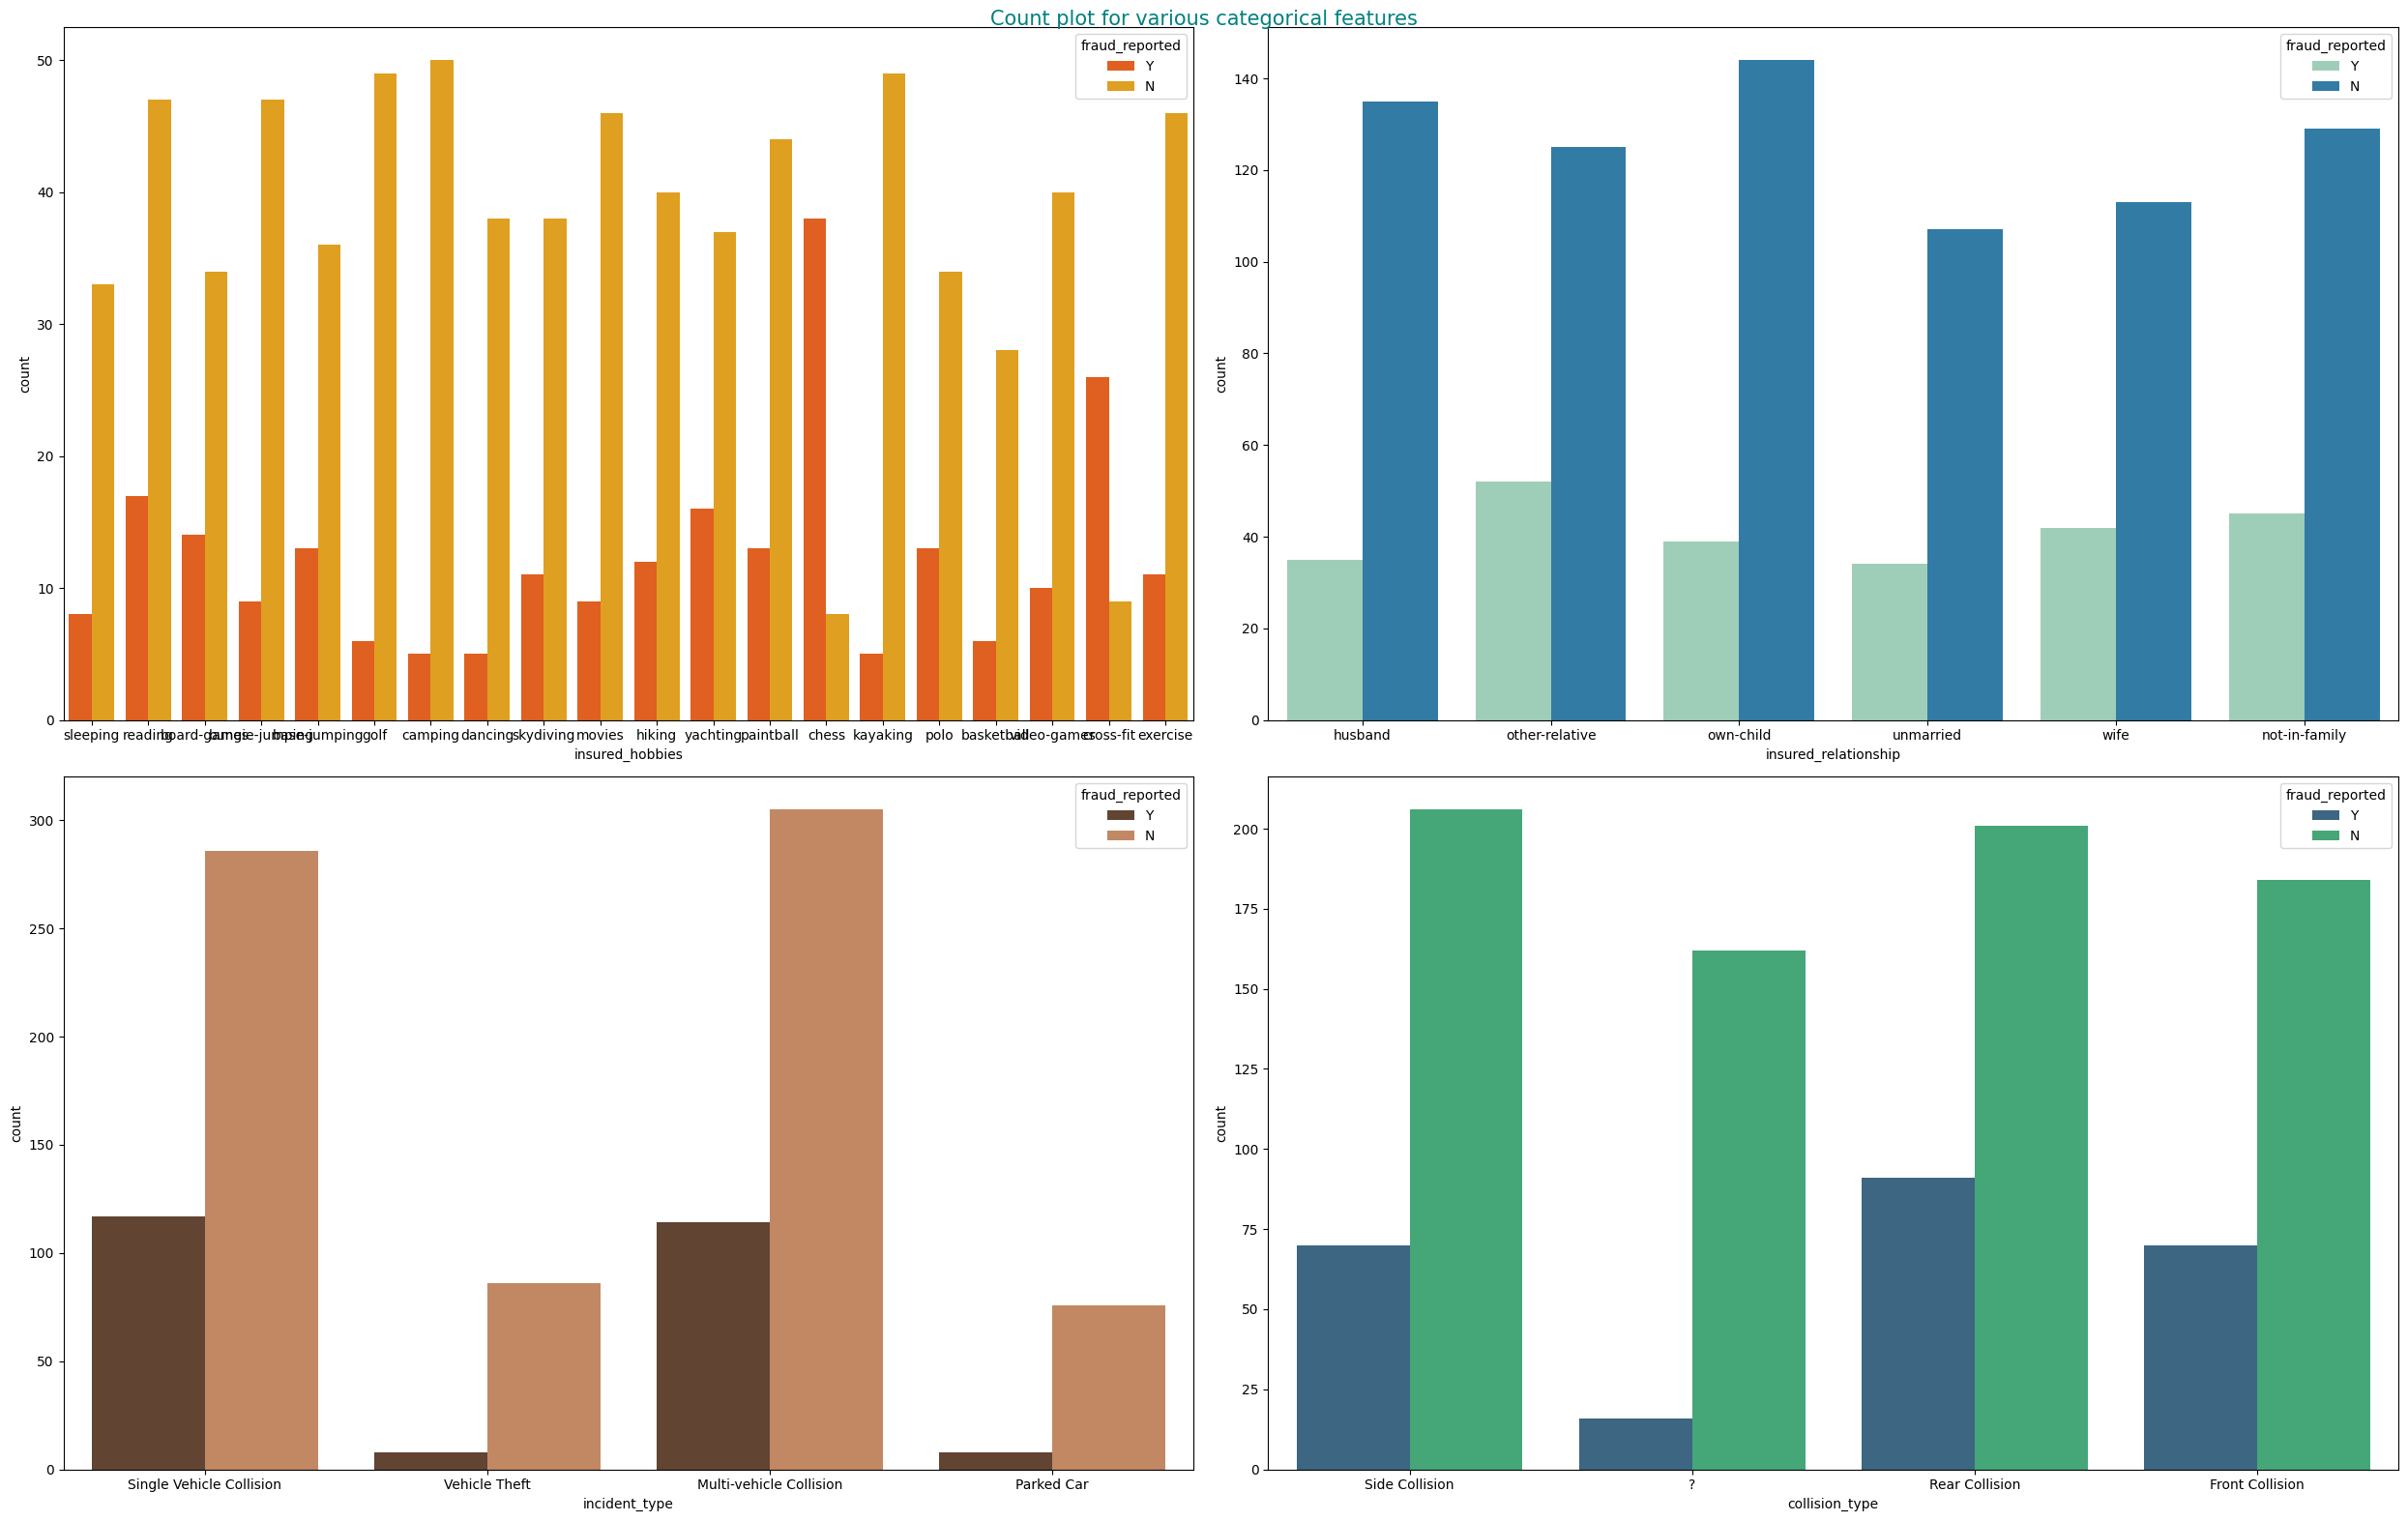

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (25, 16))
plt.suptitle('Count plot for various categorical features', fontsize = 15, color= 'teal')

ax1 = sns.countplot(x ='insured_hobbies', data= df, hue= 'fraud_reported', ax= ax[0, 0], palette= 'autumn')
ax1.set(xlabel = 'insured_hobbies')

ax2 = sns.countplot(x ='insured_relationship', data= df, hue= 'fraud_reported', ax= ax[0, 1], palette= 'YlGnBu')
ax2.set(xlabel = 'insured_relationship')

ax3 = sns.countplot(x ='incident_type', data= df, hue= 'fraud_reported', ax= ax[1, 0], palette= 'copper')
ax3.set(xlabel = 'incident_type')

ax4 = sns.countplot(x ='collision_type', data= df, hue= 'fraud_reported', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'collision_type')

plt.tight_layout()
plt.show()

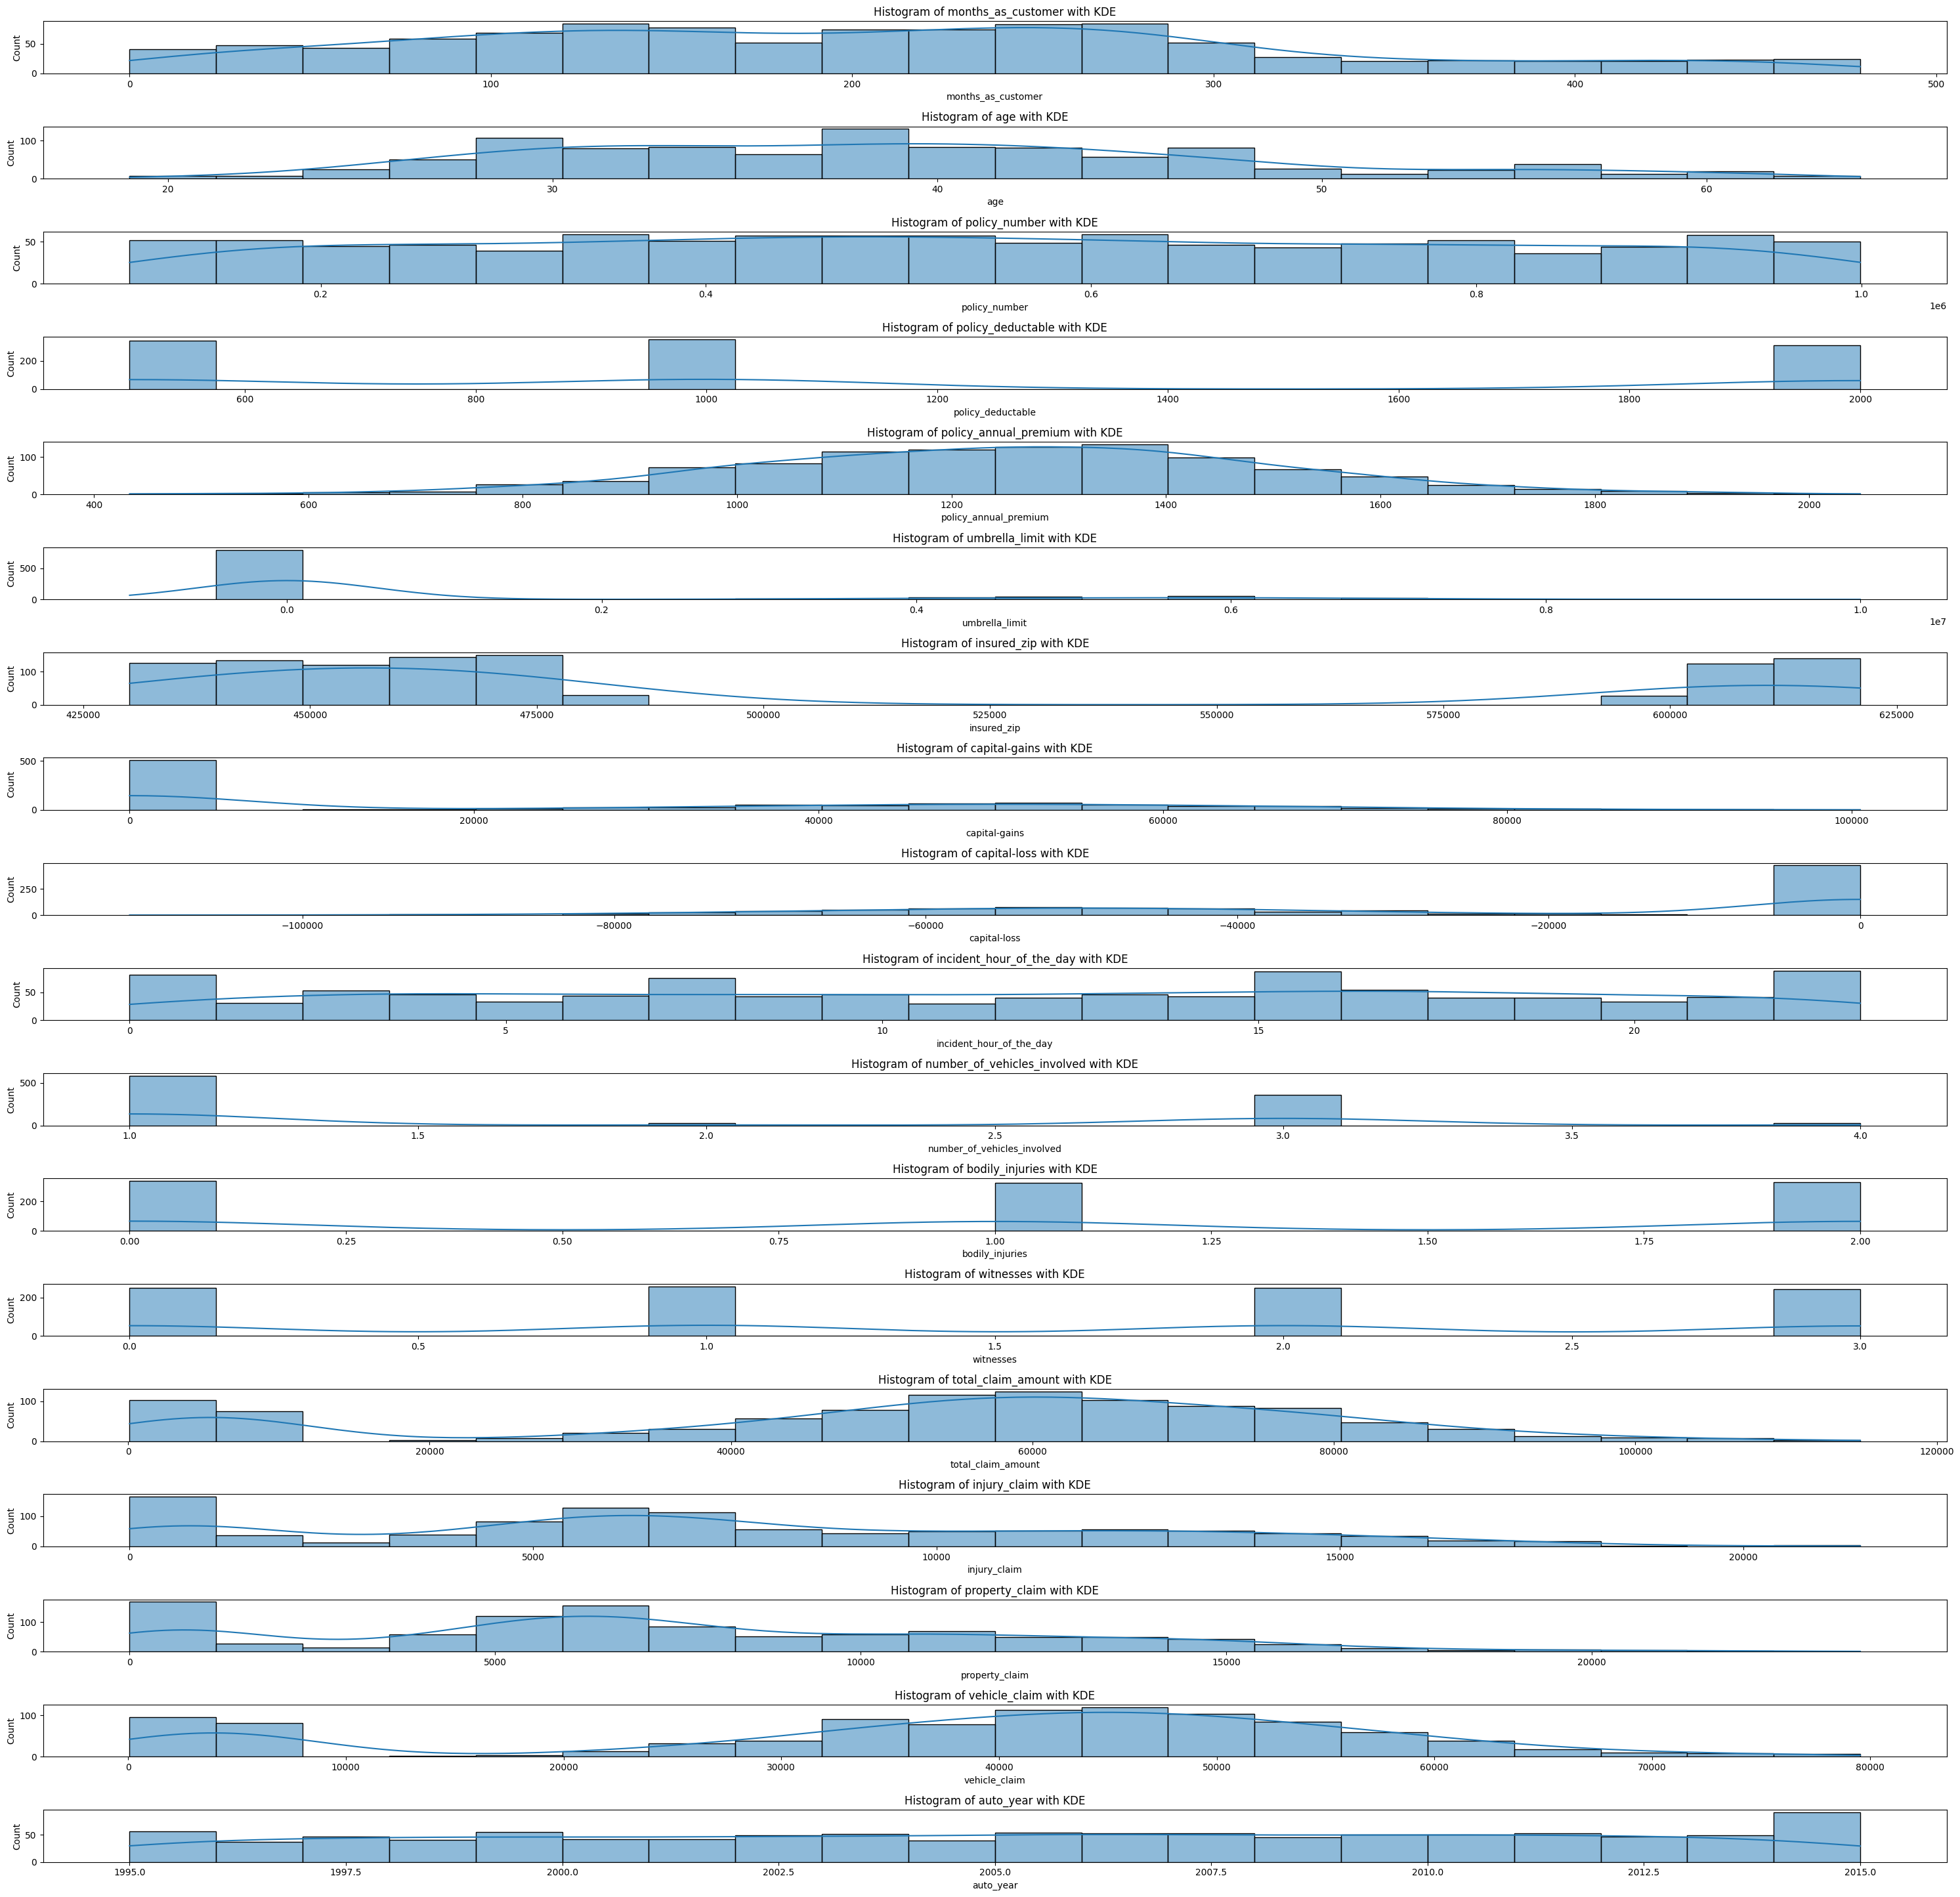

In [ ]:
#Univariate Analysis

# Histogram untuk memvisualisasikan skewness
plt.figure(figsize=(30, 29))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col} with KDE')
plt.tight_layout()
plt.show()

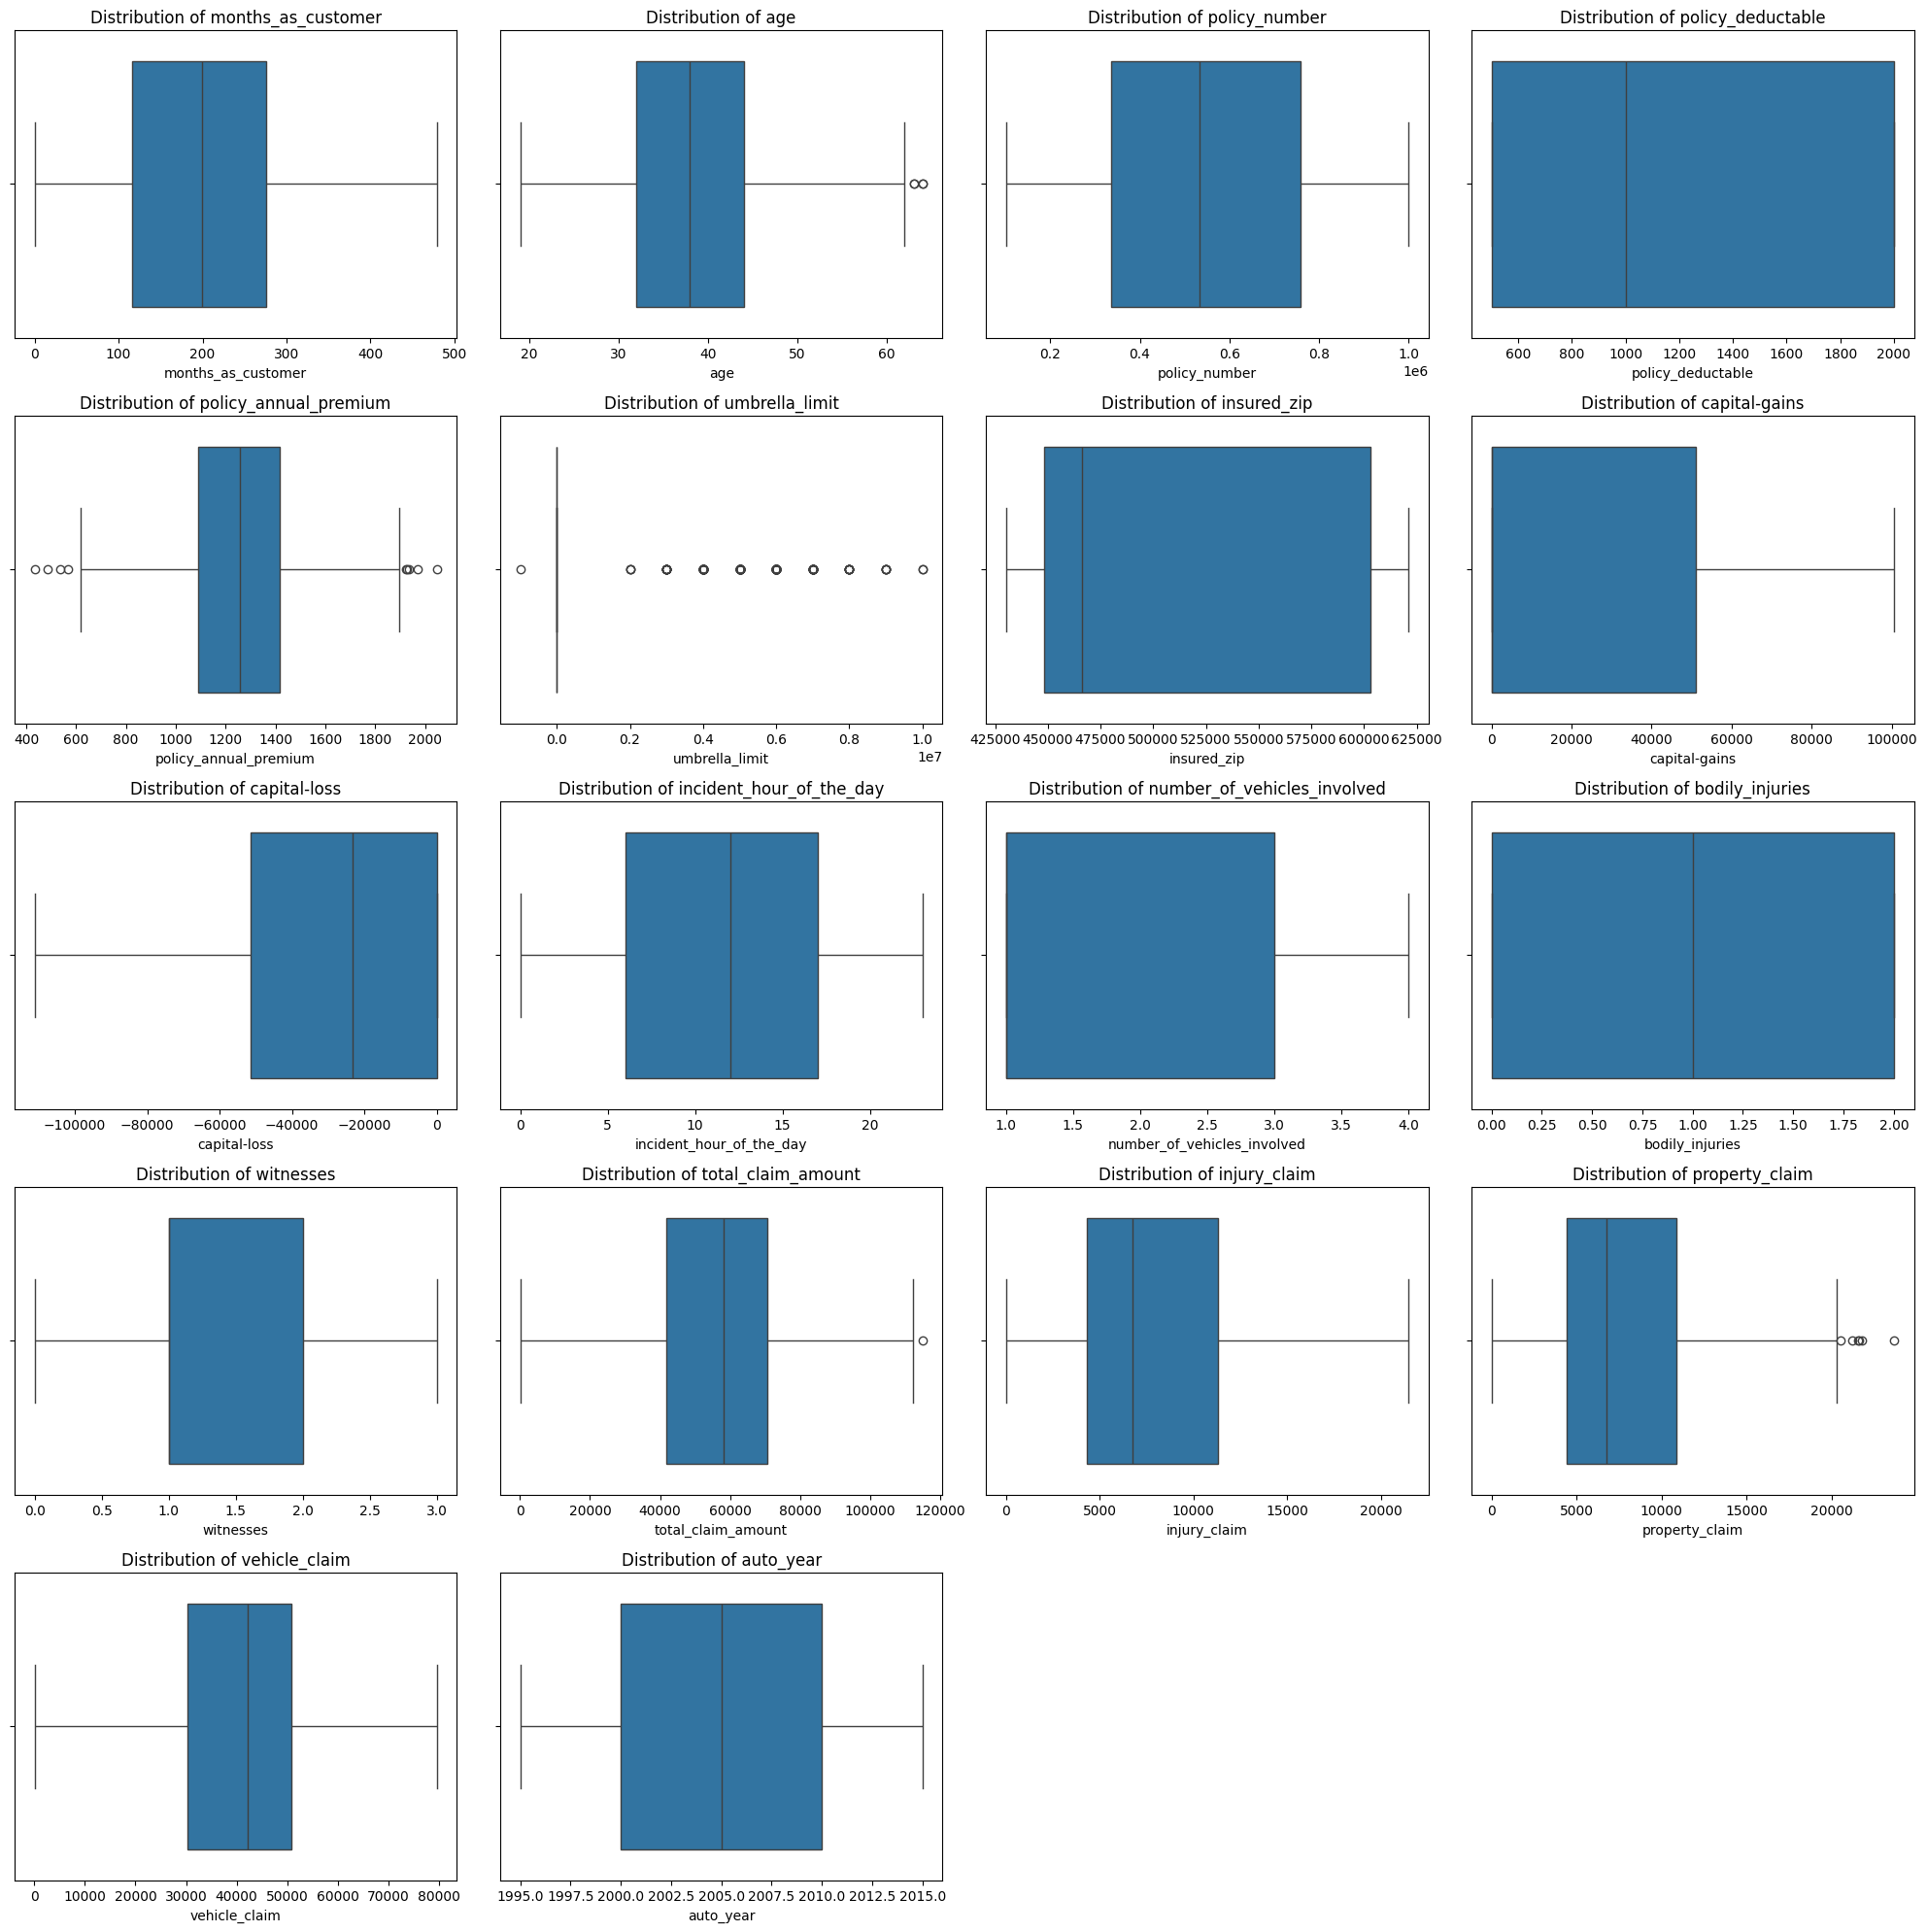

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
n = len(numerical_cols)
cols = 4
rows = math.ceil(n / cols)

# Buat subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten() if n > 1 else [axes]

# Plot setiap boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#Preprocessing tahap Awal

In [ ]:
for col in df.columns:
    print(f"Column '{col}':")
    print(df[col].unique())
    print("\n" + "-"*50 + "\n")

Column 'months_as_customer':
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 2

In [ ]:
print(df['umbrella_limit'].unique())

[       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
 10000000 -1000000  2000000]


In [ ]:
# mengubah nilai minus di umbrella_limit jadi plus
df['umbrella_limit'] = df['umbrella_limit'].abs()

In [ ]:
# convert umbrella_limit ke categorical
df['umbrella_limit'] = df['umbrella_limit'].astype('object')

# convert policy_deductable ke categorical
df['policy_deductable'] = df['policy_deductable'].astype('object')

In [ ]:
#imputasi missing value kolom authorities_contacted dengan 'UNKNOWN'
df['authorities_contacted'] = df['authorities_contacted'].fillna('UNKNOWN')

In [ ]:
# Ganti '?' dengan NaN
cols_replace = ['property_damage', 'police_report_available', 'collision_type']
for c in cols_replace:
    if c in df.columns:
        df[c] = df[c].replace('?', np.nan)

In [ ]:
# Drop kolom yang tidak relevan / terlalu unik
df = df.drop(['policy_bind_date', 'incident_date', 'policy_number', 'insured_zip',
              'incident_location', 'auto_model'], axis=1)

In [ ]:
# Encode target
df['fraud_reported'] = df['fraud_reported'].map({'N': 0, 'Y': 1})

# Split Data

In [ ]:
# PEMISAHAN FITUR DAN TARGET
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Menambahkan seed untuk reproducibility
seed = 42
# Split data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed, stratify=y
)

# Preprocessing Lanjutan

In [ ]:
!pip -q install category_encoders imbalanced-learn

import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import RobustScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
numeric_cols_raw = [
    'months_as_customer', 'age', 'policy_annual_premium',
    'capital-gains', 'capital-loss',
    'incident_hour_of_the_day', 'number_of_vehicles_involved',
    'bodily_injuries', 'witnesses',
    'total_claim_amount', 'injury_claim',
    'property_claim', 'vehicle_claim',
    'auto_year', 'days_since_policy'
]

categorical_cols_raw = [
    'policy_state', 'policy_csl', 'insured_sex',
    'insured_education_level', 'insured_occupation',
    'insured_hobbies', 'insured_relationship',
    'incident_type', 'collision_type',
    'incident_severity', 'authorities_contacted',
    'incident_state', 'incident_city',
    'property_damage', 'police_report_available', 'umbrella_limit',
    'policy_deductable', 'auto_make'
]


In [ ]:
# =========================
# preprocessing dalam pipeline (menghindari leakage)
# =========================

# kolom yang akan di encoding
te_cols = [c for c in ['auto_make', 'insured_hobbies', 'insured_occupation'] if c in X_train.columns]

ordinal_cols = [c for c in ['insured_education_level', 'incident_severity', 'umbrella_limit', 'policy_deductable', 'policy_csl']
                if c in X_train.columns]

# nominal = kategorikal lain selain ordinal dan TE
all_cat = [c for c in categorical_cols_raw if c in X_train.columns]
nominal_cols = [c for c in all_cat if c not in set(te_cols + ordinal_cols)]

# numerik
num_cols = [c for c in numeric_cols_raw if c in X_train.columns]

# ---- Pipeline per tipe fitur ----
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

te_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("te", ce.TargetEncoder(handle_unknown="value", handle_missing="value")) #handle_missing="value" artinya missing value pakai nilai global mean
])

# ORDINAL
transformers = []

if num_cols:
    transformers.append(("num", num_pipe, num_cols))

if te_cols:
    transformers.append(("te", te_pipe, te_cols))

# insured_education_level
if 'insured_education_level' in ordinal_cols:
    edu_order = ['High School', 'College', 'Associate', 'Masters', 'MD', 'JD', 'PhD']
    edu_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ord", OrdinalEncoder(categories=[edu_order], handle_unknown="use_encoded_value", unknown_value=-1))
    ])
    transformers.append(("edu_ord", edu_pipe, ['insured_education_level']))

# incident_severity
if 'incident_severity' in ordinal_cols:
    sev_order = ['Trivial Damage', 'Minor Damage', 'Major Damage', 'Total Loss']
    sev_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ord", OrdinalEncoder(categories=[sev_order], handle_unknown="use_encoded_value", unknown_value=-1))
    ])
    transformers.append(("sev_ord", sev_pipe, ['incident_severity']))

# umbrella_limit
if 'umbrella_limit' in ordinal_cols:
    umbrella_order = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
    umb_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ord", OrdinalEncoder(categories=[umbrella_order], handle_unknown="use_encoded_value", unknown_value=-1))
    ])
    transformers.append(("umb_ord", umb_pipe, ['umbrella_limit']))

# policy_deductable
if 'policy_deductable' in ordinal_cols:
    deductible_order = [500, 1000, 2000]
    ded_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ord", OrdinalEncoder(categories=[deductible_order], handle_unknown="use_encoded_value", unknown_value=-1))
    ])
    transformers.append(("ded_ord", ded_pipe, ['policy_deductable']))

# policy_csl
if 'policy_csl' in ordinal_cols:
    csl_order = ['100/300', '250/500', '500/1000']
    csl_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ord", OrdinalEncoder(categories=[csl_order], handle_unknown="use_encoded_value", unknown_value=-1))
    ])
    transformers.append(("csl_ord", csl_pipe, ['policy_csl']))

# OneHot untuk nominal
if nominal_cols:
    ohe_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"))
    ])
    transformers.append(("nom_ohe", ohe_pipe, nominal_cols))

preprocess = ColumnTransformer(
    transformers=transformers,
    remainder="drop"
)

In [ ]:
# NOTE: fit ini HANYA untuk inspeksi feature names,
# pipeline training & CV tetap fit ulang secara aman
preprocess.fit(X_train, y_train)

def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:
        if transformer == 'drop':
            continue

        # kalau pipeline
        if hasattr(transformer, 'named_steps'):
            last_step = list(transformer.named_steps.values())[-1]

            # OneHotEncoder
            if isinstance(last_step, OneHotEncoder):
                ohe_features = last_step.get_feature_names_out(cols)
                feature_names.extend(ohe_features)

            # TargetEncoder / OrdinalEncoder / scaler
            else:
                feature_names.extend(cols)

        else:
            feature_names.extend(cols)

    return feature_names

feature_names = get_feature_names(preprocess)
for f in feature_names:
    print(f)

months_as_customer
age
policy_annual_premium
capital-gains
capital-loss
incident_hour_of_the_day
number_of_vehicles_involved
bodily_injuries
witnesses
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_year
auto_make
insured_hobbies
insured_occupation
insured_education_level
incident_severity
umbrella_limit
policy_deductable
policy_csl
policy_state_IN
policy_state_OH
insured_sex_MALE
insured_relationship_not-in-family
insured_relationship_other-relative
insured_relationship_own-child
insured_relationship_unmarried
insured_relationship_wife
incident_type_Parked Car
incident_type_Single Vehicle Collision
incident_type_Vehicle Theft
collision_type_Rear Collision
collision_type_Side Collision
authorities_contacted_Fire
authorities_contacted_Other
authorities_contacted_Police
authorities_contacted_UNKNOWN
incident_state_NY
incident_state_OH
incident_state_PA
incident_state_SC
incident_state_VA
incident_state_WV
incident_city_Columbus
incident_city_Hillsdale
incident_city_Nort

# hybrid ensemble stacking model

In [ ]:
!pip install optuna==3.6.0

import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.pipeline import Pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 3.7 MB/s eta 0:00:00


## Bangun XGBoost

In [ ]:
# ============================================================
# Membangun model XGBoost
# ============================================================

# hyperparameter untuk keseimbangan kelas (proporsi distribusi)
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Cari best XGBoost (Base Model) dengan Optuna
def objective_xgb(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 30, 120), #jumlah pohon
        'max_depth': trial.suggest_int('max_depth', 2, 3), #kedalaman pohon
        'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.1), #laju pembelajaran
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 15), #berapa child yang di split
        'gamma': trial.suggest_float('gamma', 0.5, 5.0), #regularisasi untuk bobot pohon
        'subsample': trial.suggest_float('subsample', 0.6, 0.85), #proporsi data latih yang digunakan setiap pohon
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.85), #proporsi fitur yang digunakan pohon
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 5.0), #penalti L1 untuk daun
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 10.0), #penalti L2 untuk daun
        'scale_pos_weight': scale_pos_weight,
        'eval_metric': 'logloss',
        'random_state': seed,
        'n_jobs': -1 #Mempercepat waktu eksekusi
    }

    xgb_model = XGBClassifier(**params)
    pipe = Pipeline(steps=[
        ("prep", preprocess),
        ("clf", xgb_model),
    ])
    return cross_val_score(pipe, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1).mean()

study_xgb = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
study_xgb.optimize(objective_xgb, n_trials=100)

print("Best XGB Params:", study_xgb.best_params)

# Create the full pipeline for XGBoost, including preprocessing
best_xgb = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", XGBClassifier(
        **study_xgb.best_params,
        scale_pos_weight=scale_pos_weight,
        eval_metric="logloss",
        random_state=seed,
        n_jobs=-1
    ))
])

# Fit this full pipeline. This 'best_xgb' will now be used consistently in StackingClassifier
best_xgb.fit(X_train, y_train)

[I 2026-01-10 06:51:00,828] A new study created in memory with name: no-name-7ed18661-86b1-4269-a3ca-dc64dad04559
[I 2026-01-10 06:51:08,139] Trial 0 finished with value: 0.8686343971550883 and parameters: {'n_estimators': 64, 'max_depth': 3, 'learning_rate': 0.08123957592679837, 'min_child_weight': 11, 'gamma': 1.2020838819909643, 'subsample': 0.6389986300840507, 'colsample_bytree': 0.6145209030420499, 'reg_alpha': 4.344263114297182, 'reg_lambda': 6.41003510568888}. Best is trial 0 with value: 0.8686343971550883.
[I 2026-01-10 06:51:09,357] Trial 1 finished with value: 0.8672371439141695 and parameters: {'n_estimators': 94, 'max_depth': 2, 'learning_rate': 0.09789368965133961, 'min_child_weight': 14, 'gamma': 1.4555259980522428, 'subsample': 0.6454562418017751, 'colsample_bytree': 0.6458511274633585, 'reg_alpha': 1.590786990501735, 'reg_lambda': 5.72280788469014}. Best is trial 0 with value: 0.8686343971550883.
[I 2026-01-10 06:51:11,023] Trial 2 finished with value: 0.883364983729340

Best XGB Params: {'n_estimators': 37, 'max_depth': 2, 'learning_rate': 0.035289850979681785, 'min_child_weight': 5, 'gamma': 4.94434936986905, 'subsample': 0.7904159162103305, 'colsample_bytree': 0.8388569831927796, 'reg_alpha': 2.4480943411466765, 'reg_lambda': 1.4859247870983738}


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_annual_premium',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_amount',
                                                   'injury...
                               gamma=4.94434936986905, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.035289850979681785, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=2,
                               max_leaves=None, min_child_weight=5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=37, n_jobs=-1,
                               num_parallel_tree=None, ...))])

## Bangun Lasso

In [ ]:
# ============================================================
# Membangun model Lasso
# ============================================================

# Fungsi optimisasi Lasso dengan Optuna
def objective_lasso(trial):
    C = trial.suggest_float('C', 0.001, 0.1, log=True)
    model = LogisticRegression(penalty='l1', C=C, solver='saga', class_weight= 'balanced', max_iter=2000, random_state=seed)
    # Memasukkan preprocessing ke pipeline
    pipe = Pipeline(steps=[
        ("prep", preprocess),
        ('lasso', model)
    ])
    return cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

# Optimize Lasso menggunakan Optuna
study_lasso = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
study_lasso.optimize(objective_lasso, n_trials=50)

# Tampilkan hasil terbaik
best_C = study_lasso.best_params['C']
print("Best Lasso Params:", study_lasso.best_params)
print("Best AUC (CV):", study_lasso.best_value)

# Bangun model final dengan konfigurasi terbaik
best_lasso = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        penalty='l1',
        C=best_C,
        solver='saga',
        max_iter=2000,
        class_weight='balanced',
        random_state=seed
    ))
])

# Latih model final pada seluruh data pelatihan
best_lasso.fit(X_train, y_train)


[I 2026-01-10 06:52:33,966] A new study created in memory with name: no-name-794abf70-0ca9-4842-8440-94f3c835c16a
[I 2026-01-10 06:52:34,472] Trial 0 finished with value: 0.5 and parameters: {'C': 0.005611516415334507}. Best is trial 0 with value: 0.5.
[I 2026-01-10 06:52:35,686] Trial 1 finished with value: 0.667299599084917 and parameters: {'C': 0.07969454818643935}. Best is trial 1 with value: 0.667299599084917.
[I 2026-01-10 06:52:36,670] Trial 2 finished with value: 0.5998721073334995 and parameters: {'C': 0.029106359131330698}. Best is trial 1 with value: 0.667299599084917.
[I 2026-01-10 06:52:37,596] Trial 3 finished with value: 0.5 and parameters: {'C': 0.015751320499779727}. Best is trial 1 with value: 0.667299599084917.
[I 2026-01-10 06:52:38,660] Trial 4 finished with value: 0.5 and parameters: {'C': 0.0020513382630874496}. Best is trial 1 with value: 0.667299599084917.
[I 2026-01-10 06:52:39,719] Trial 5 finished with value: 0.5 and parameters: {'C': 0.002051110418843397}. 

Best Lasso Params: {'C': 0.099727047381825}
Best AUC (CV): 0.7060023103581055


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_annual_premium',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_amount',
                                                   'injury...
                                                                                 handle_unknown='ignore'))]),
                                                  ['policy_state',
                                                   'insured_sex',
                                                   'insured_relationship',
                                                   'incident_type',
                                                   'collision_type',
                                                   'authorities_contacted',
                                                   'incident_state',
                                                   'incident_city',
                                                   'property_damage',
                                                   'police_report_available'])])),
                ('clf',
                 LogisticRegression(C=0.099727047381825,
                                    class_weight='balanced', max_iter=2000,
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

## Bangun Meta Learner (Ridge)


In [ ]:
# ============================================================
# parameter untuk meta learner
# ============================================================

meta_lr = LogisticRegression(
    penalty='l2',
    C=1.0,
    max_iter=2000,
    class_weight='balanced',
    random_state=seed
)

## Stacking


In [ ]:
# ============================================================
# Bangun Ulang Model Stacking
# ============================================================

skf_stacking = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
# Pasang di Stacking
final_stack = StackingClassifier(
    estimators=[
        ('lasso', best_lasso),
        ('xgb', best_xgb)
    ],
    final_estimator=meta_lr,
    cv=skf_stacking,
    n_jobs=-1,
)

final_stack.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('lasso',
                                Pipeline(steps=[('prep',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer(strategy='median')),
                                                                                                  ('scaler',
                                                                                                   RobustScaler())]),
                                                                                  ['months_as_customer',
                                                                                   'age',
                                                                                   'policy_annual_premium',
                                                                                   'capital-gains',
                                                                                   'capital-loss',
                                                                                   'incident_hour_...
                                                               learning_rate=0.035289850979681785,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=2,
                                                               max_leaves=None,
                                                               min_child_weight=5,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=37,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None, ...))]))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=2000,
                                                      random_state=42),
                   n_jobs=-1)

# Evaluasi Model

In [ ]:
# ============================================================
# FUNGSI EVALUASI
# ============================================================
def evaluate_model_full(y_true, y_proba, name="Model"):
    roc_auc = roc_auc_score(y_true, y_proba)
    y_pred = (y_proba >= 0.5).astype(int)

    recall_fraud = recall_score(y_true, y_pred, pos_label=1)
    precision_fraud = precision_score(y_true, y_pred, pos_label=1)
    f1_fraud = f1_score(y_true, y_pred, pos_label=1)
    accuracy = accuracy_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    print(f"=== {name} ===")
    print(f" ROC-AUC            : {roc_auc:.4f}")
    print(f" Accuracy           : {accuracy:.4f}")
    print(f" Precision (Fraud)  : {precision_fraud:.4f}")
    print(f" Recall (Fraud)     : {recall_fraud:.4f}")
    print(f" F1-Score (Fraud)   : {f1_fraud:.4f}")
    print(f" Specificity (Non-F): {specificity:.4f}")
    print(classification_report(y_true, y_pred))
    print("-" * 60)

In [ ]:
# ============================================================
# EVALUASI: STACKING vs LASSO vs XGBoost (data test)
# ============================================================

y_proba_stack = final_stack.predict_proba(X_test)[:, 1]
y_proba_lasso = best_lasso.predict_proba(X_test)[:, 1]
y_proba_xgb   = best_xgb.predict_proba(X_test)[:, 1]

evaluate_model_full(y_test, y_proba_stack,
                    "Hybrid Stacking (Lasso + XGB → LR)")

evaluate_model_full(y_test, y_proba_lasso,
                    "Baseline Lasso Logistic Regression")

evaluate_model_full(y_test, y_proba_xgb,
                    "Baseline XGBoost (Tuned Bayesian)")


=== Hybrid Stacking (Lasso + XGB → LR) ===
 ROC-AUC            : 0.8668
 Accuracy           : 0.8533
 Precision (Fraud)  : 0.6531
 Recall (Fraud)     : 0.8649
 F1-Score (Fraud)   : 0.7442
 Specificity (Non-F): 0.8496
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       226
           1       0.65      0.86      0.74        74

    accuracy                           0.85       300
   macro avg       0.80      0.86      0.82       300
weighted avg       0.88      0.85      0.86       300

------------------------------------------------------------
=== Baseline Lasso Logistic Regression ===
 ROC-AUC            : 0.6805
 Accuracy           : 0.6833
 Precision (Fraud)  : 0.3939
 Recall (Fraud)     : 0.5270
 F1-Score (Fraud)   : 0.4509
 Specificity (Non-F): 0.7345
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       226
           1       0.39      0.53      0.45        74

    accuracy  

In [ ]:
# ============================================================
# EVALUASI: STACKING vs LASSO vs XGBoost (data train)
# ============================================================

y_proba_stack_train = final_stack.predict_proba(X_train)[:, 1]
y_proba_lasso_train = best_lasso.predict_proba(X_train)[:, 1]
y_proba_xgb_train   = best_xgb.predict_proba(X_train)[:, 1]

evaluate_model_full(y_train, y_proba_stack_train,
                    "Hybrid Stacking (Lasso + XGB → LR)")

evaluate_model_full(y_train, y_proba_lasso_train,
                    "Baseline Lasso Logistic Regression")

evaluate_model_full(y_train, y_proba_xgb_train,
                    "Baseline XGBoost (Tuned Bayesian)")

=== Hybrid Stacking (Lasso + XGB → LR) ===
 ROC-AUC            : 0.9144
 Accuracy           : 0.8543
 Precision (Fraud)  : 0.6485
 Recall (Fraud)     : 0.8960
 F1-Score (Fraud)   : 0.7524
 Specificity (Non-F): 0.8406
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       527
           1       0.65      0.90      0.75       173

    accuracy                           0.85       700
   macro avg       0.80      0.87      0.82       700
weighted avg       0.88      0.85      0.86       700

------------------------------------------------------------
=== Baseline Lasso Logistic Regression ===
 ROC-AUC            : 0.7804
 Accuracy           : 0.7157
 Precision (Fraud)  : 0.4488
 Recall (Fraud)     : 0.6590
 F1-Score (Fraud)   : 0.5340
 Specificity (Non-F): 0.7343
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       527
           1       0.45      0.66      0.53       173

    accuracy  

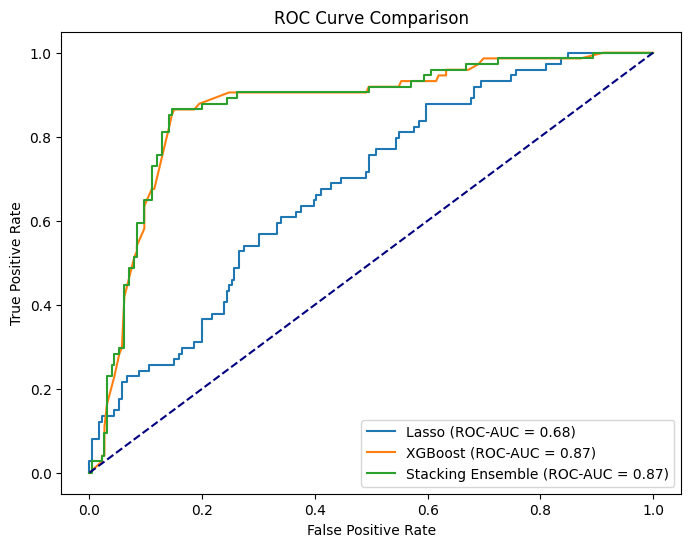

In [ ]:
from sklearn.metrics import roc_curve

# Menghitung probabilitas untuk tiap model
y_proba_lasso = best_lasso.predict_proba(X_test)[:, 1]
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_proba_stack = final_stack.predict_proba(X_test)[:, 1]

# Menghitung ROC curve untuk tiap model
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_proba_lasso)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_proba_stack)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lasso, tpr_lasso, label='Lasso (ROC-AUC = %0.2f)' % roc_auc_score(y_test, y_proba_lasso))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (ROC-AUC = %0.2f)' % roc_auc_score(y_test, y_proba_xgb))
plt.plot(fpr_stack, tpr_stack, label='Stacking Ensemble (ROC-AUC = %0.2f)' % roc_auc_score(y_test, y_proba_stack))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


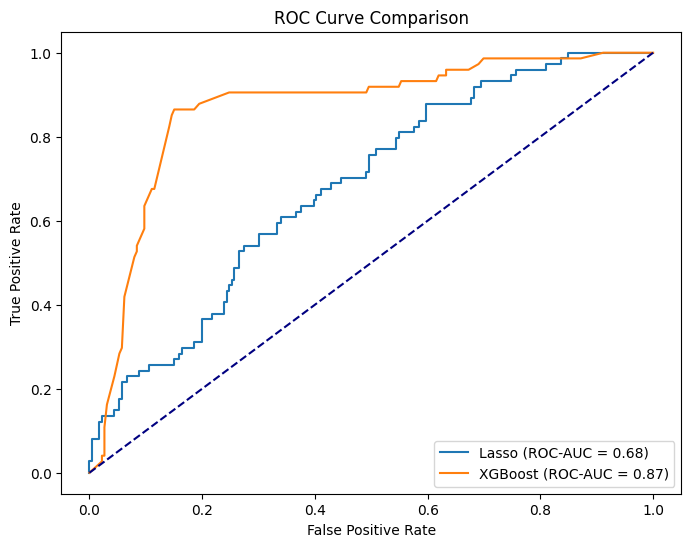

In [ ]:
from sklearn.metrics import roc_curve

# Menghitung probabilitas untuk tiap model
y_proba_lasso = best_lasso.predict_proba(X_test)[:, 1]
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Menghitung ROC curve untuk tiap model
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_proba_lasso)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lasso, tpr_lasso, label='Lasso (ROC-AUC = %0.2f)' % roc_auc_score(y_test, y_proba_lasso))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (ROC-AUC = %0.2f)' % roc_auc_score(y_test, y_proba_xgb))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


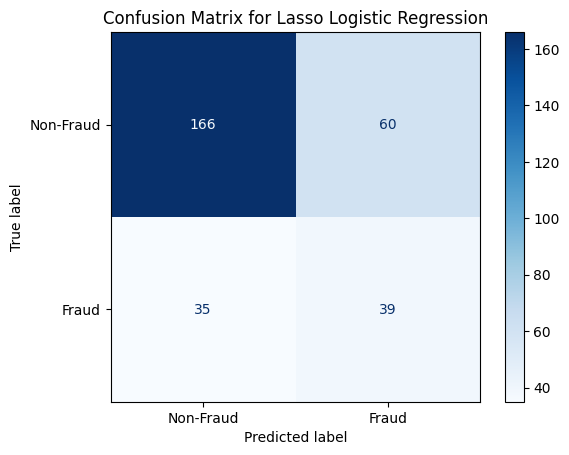

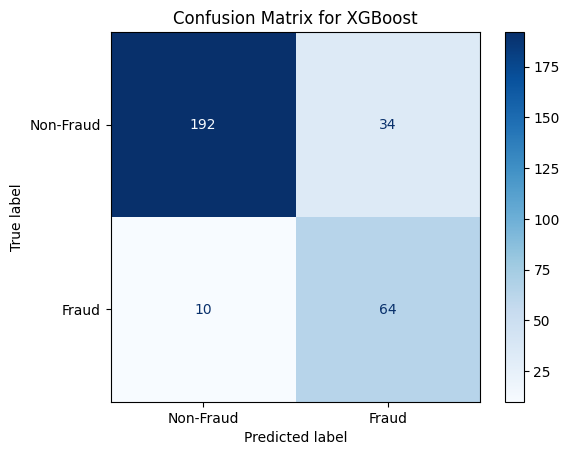

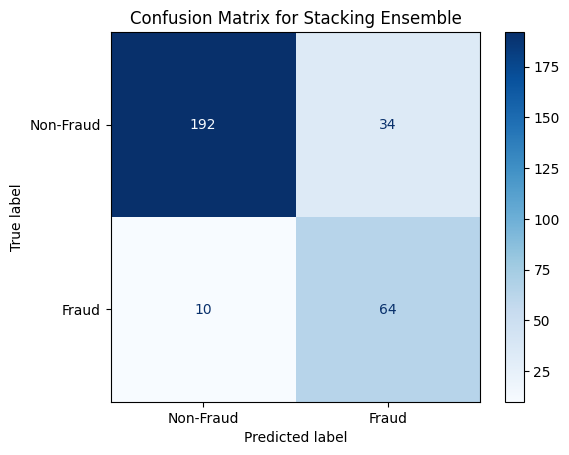

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix untuk Lasso
cm_lasso = confusion_matrix(y_test, (y_proba_lasso >= 0.5).astype(int))
disp_lasso = ConfusionMatrixDisplay(confusion_matrix=cm_lasso, display_labels=["Non-Fraud", "Fraud"])
disp_lasso.plot(cmap="Blues")
plt.title("Confusion Matrix for Lasso Logistic Regression")
plt.show()

# Confusion Matrix untuk XGBoost
cm_xgb = confusion_matrix(y_test, (y_proba_xgb >= 0.5).astype(int))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Non-Fraud", "Fraud"])
disp_xgb.plot(cmap="Blues")
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Confusion Matrix untuk Stacking
cm_stack = confusion_matrix(y_test, (y_proba_stack >= 0.5).astype(int))
disp_stack = ConfusionMatrixDisplay(confusion_matrix=cm_stack, display_labels=["Non-Fraud", "Fraud"])
disp_stack.plot(cmap="Blues")
plt.title("Confusion Matrix for Stacking Ensemble")
plt.show()


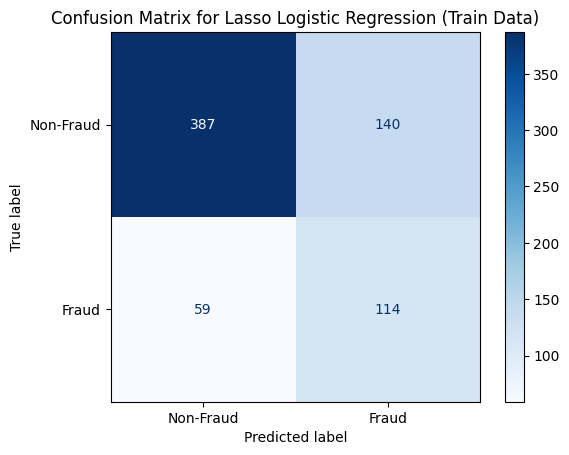

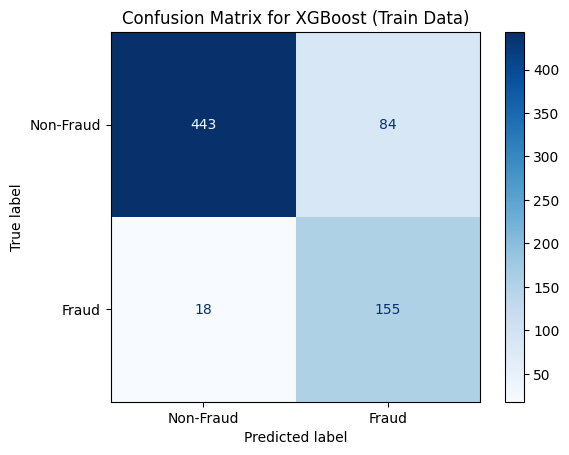

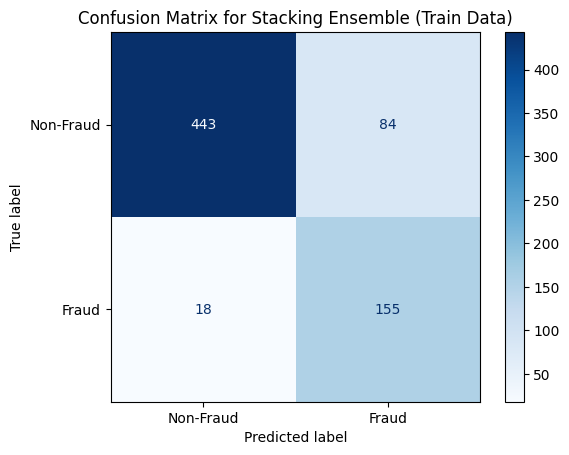

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict probabilities on training data
y_train_proba_lasso = best_lasso.predict_proba(X_train)[:, 1]
y_train_proba_xgb = best_xgb.predict_proba(X_train)[:, 1]
y_train_proba_stack = final_stack.predict_proba(X_train)[:, 1]

# Confusion Matrix for Lasso on training data
cm_train_lasso = confusion_matrix(y_train, (y_train_proba_lasso >= 0.5).astype(int))
disp_train_lasso = ConfusionMatrixDisplay(confusion_matrix=cm_train_lasso, display_labels=["Non-Fraud", "Fraud"])
disp_train_lasso.plot(cmap="Blues")
plt.title("Confusion Matrix for Lasso Logistic Regression (Train Data)")
plt.show()

# Confusion Matrix for XGBoost on training data
cm_train_xgb = confusion_matrix(y_train, (y_train_proba_xgb >= 0.5).astype(int))
disp_train_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_train_xgb, display_labels=["Non-Fraud", "Fraud"])
disp_train_xgb.plot(cmap="Blues")
plt.title("Confusion Matrix for XGBoost (Train Data)")
plt.show()

# Confusion Matrix for Stacking on training data
cm_train_stack = confusion_matrix(y_train, (y_train_proba_stack >= 0.5).astype(int))
disp_train_stack = ConfusionMatrixDisplay(confusion_matrix=cm_train_stack, display_labels=["Non-Fraud", "Fraud"])
disp_train_stack.plot(cmap="Blues")
plt.title("Confusion Matrix for Stacking Ensemble (Train Data)")
plt.show()

                    feature  importance
18        incident_severity    0.342607
15          insured_hobbies    0.276210
11           property_claim    0.152136
16       insured_occupation    0.056876
14                auto_make    0.048411
19           umbrella_limit    0.045088
1                       age    0.042894
17  insured_education_level    0.035777
0        months_as_customer    0.000000
4              capital-loss    0.000000


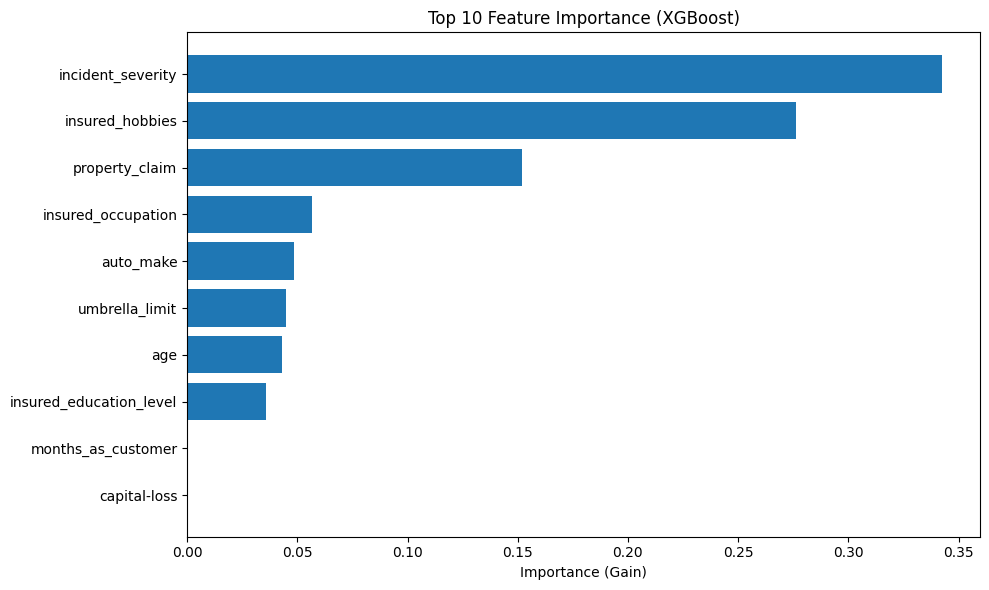

In [ ]:
# Ambil importance
importances = best_xgb.named_steps['clf'].feature_importances_

# Dapatkan nama fitur dari preprocessor setelah transform
feature_names = get_feature_names(preprocess)

# Buat DataFrame
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feat_imp.head(10))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['feature'][:10], feat_imp['importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importance (XGBoost)')
plt.xlabel('Importance (Gain)')
plt.tight_layout()
plt.show()

In [ ]:
# Cek koefisien Lasso
# ambil fitur dari preprocessing
transformed_feature_names = get_feature_names(best_lasso.named_steps['prep'])

lasso_coeff = pd.DataFrame({
    'feature': transformed_feature_names,
    'coefficient': best_lasso.named_steps['clf'].coef_[0] # Akses koefisien dari estimator di dalam pipeline
})

# Menampilkan fitur yang memiliki koefisien 0
lasso_coeff_zeros = lasso_coeff[lasso_coeff['coefficient'] == 0]
print("Fitur dengan koefisien 0 (dihapus oleh Lasso):")
print(lasso_coeff_zeros)

# Menampilkan fitur yang dipertahankan (koefisien non-zero)
lasso_coeff_non_zero = lasso_coeff[lasso_coeff['coefficient'] != 0]
print("\nFitur yang dipertahankan oleh Lasso:")
print(lasso_coeff_non_zero)


Fitur dengan koefisien 0 (dihapus oleh Lasso):
                                   feature  coefficient
0                       months_as_customer          0.0
1                                      age          0.0
2                    policy_annual_premium          0.0
3                            capital-gains          0.0
4                             capital-loss          0.0
5                 incident_hour_of_the_day          0.0
6              number_of_vehicles_involved          0.0
7                          bodily_injuries          0.0
9                       total_claim_amount          0.0
10                            injury_claim          0.0
13                               auto_year          0.0
14                               auto_make          0.0
16                      insured_occupation          0.0
20                       policy_deductable          0.0
22                         policy_state_IN          0.0
23                         policy_state_OH          0.0
2

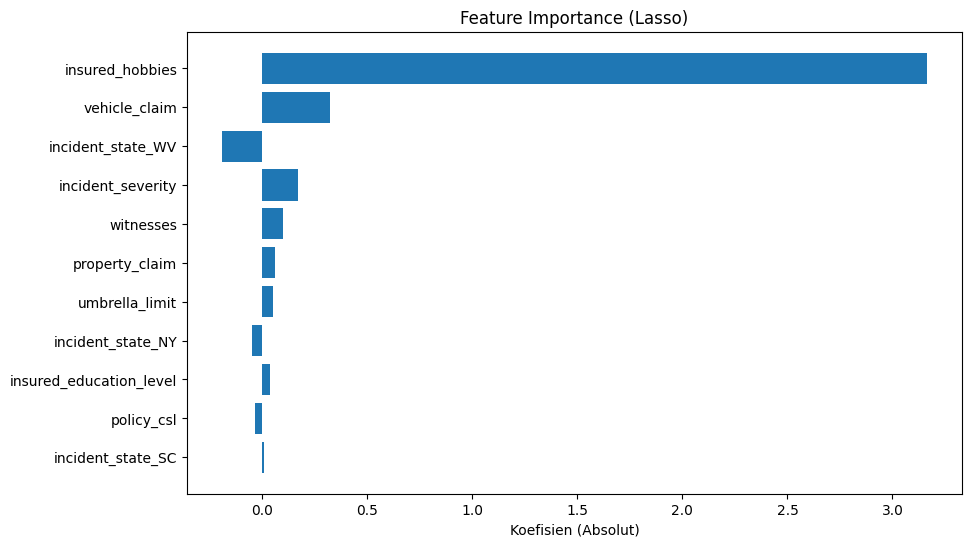

In [ ]:
# Visualisasi feature importance di Lasso dengan koefisien absolut
plt.figure(figsize=(10, 6))
lasso_coeff_non_zero = lasso_coeff[lasso_coeff['coefficient'] != 0]
lasso_coeff_non_zero = lasso_coeff_non_zero.sort_values(by='coefficient', key=abs, ascending=False)

plt.barh(lasso_coeff_non_zero['feature'], lasso_coeff_non_zero['coefficient'])
plt.xlabel('Koefisien (Absolut)')
plt.title('Feature Importance (Lasso)')
plt.gca().invert_yaxis()  # Membalik agar fitur paling penting di atas
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Lihat bobot
print("Bobot Lasso  :", final_stack.final_estimator_.coef_[0][0])
print("Bobot XGBoost:", final_stack.final_estimator_.coef_[0][1])

Bobot Lasso  : 0.5169316161087744
Bobot XGBoost: 7.957007218391832


# info tambahan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# =============================
# HITUNG METRIK PER MODEL
# =============================

def compute_metrics(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)

    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

metrics_lasso = compute_metrics(y_test, y_proba_lasso)
metrics_xgb   = compute_metrics(y_test, y_proba_xgb)
metrics_stack = compute_metrics(y_test, y_proba_stack)

# =============================
# DATA UNTUK PLOTTING
# =============================

metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

lasso_values = [metrics_lasso[m] for m in metric_names]
xgb_values   = [metrics_xgb[m] for m in metric_names]
stack_values = [metrics_stack[m] for m in metric_names]

x = np.arange(len(metric_names))  # posisi metrik
width = 0.25  # lebar setiap bar

# =============================
# PLOT GROUPED BAR CHART
# =============================

plt.figure(figsize=(12, 7))

plt.bar(x - width, lasso_values, width, label='Lasso', color= 'blue', alpha=0.7)
plt.bar(x, xgb_values, width, label='XGBoost', color='darkorange', alpha=0.7)
plt.bar(x + width, stack_values, width, label='Stacking ensemble', color='green', alpha=0.7)

# Label nilai pada tiap bar
for i in range(len(metric_names)):
    plt.text(x[i] - width, lasso_values[i] + 0.02, f"{lasso_values[i]:.3f}", ha='center')
    plt.text(x[i], xgb_values[i] + 0.02, f"{xgb_values[i]:.3f}", ha='center')
    plt.text(x[i] + width, stack_values[i] + 0.02, f"{stack_values[i]:.3f}", ha='center')

plt.xticks(x, metric_names)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title("Perbandingan Metrik Evaluasi Antar Model")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [ ]:
#overfitting check
print("data test")
y_proba_stack = final_stack.predict_proba(X_test)[:, 1]
evaluate_model_full(y_test, y_proba_stack, "Hybrid Stacking")

print("data train")
y_proba_stack_train = final_stack.predict_proba(X_train)[:, 1]
evaluate_model_full(y_train, y_proba_stack_train, "Hybrid Stacking (Train)")

In [ ]:
coeff = best_lasso.named_steps['clf'].coef_
intercept = best_lasso.named_steps['clf'].intercept_

print("coeff lasso: ", coeff)
print("intercept lasso: ", intercept)

In [ ]:
coeff_meta = final_stack.final_estimator_.coef_
intercept_meta = final_stack.final_estimator_.intercept_

print("coeff ridge: ", coeff_meta)
print("intercept ridge: ", intercept_meta)

In [ ]:
from sklearn.metrics import roc_curve

# Menghitung probabilitas untuk tiap model
y_proba_stack_test = final_stack.predict_proba(X_test)[:, 1]
y_proba_stack_train = final_stack.predict_proba(X_train)[:, 1]

# Menghitung ROC curve untuk tiap model
fpr_stack_test, tpr_stack_test, _ = roc_curve(y_test, y_proba_stack_test)
fpr_stack_train, tpr_stack_train, _ = roc_curve(y_train, y_proba_stack_train)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stack_test, tpr_stack_test, label='Stacking Ensemble Test(ROC-AUC = %0.2f)' % roc_auc_score(y_test, y_proba_stack_test))
plt.plot(fpr_stack_train, tpr_stack_train, label='Stacking Ensemble Train(ROC-AUC = %0.2f)' % roc_auc_score(y_train, y_proba_stack_train))


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

## input data baru

In [ ]:
# ============================
# INPUT DATA BARU (1 KLAIM)
# ============================

new_claim = {
    'months_as_customer': 120,
    'age': 45,
    'policy_state': 'OH',
    'policy_csl': '250/500',
    'policy_deductable': 1000,
    'policy_annual_premium': 1200,
    'umbrella_limit': 0,
    'insured_sex': 'MALE',
    'insured_education_level': 'College',
    'insured_occupation': 'sales',
    'insured_hobbies': 'chess',
    'insured_relationship': 'husband',
    'capital-gains': 0,
    'capital-loss': 0,
    'incident_type': 'Collision',
    'collision_type': 'Rear Collision',
    'incident_severity': 'Major Damage',
    'authorities_contacted': 'Police',
    'incident_state': 'OH',
    'incident_city': 'Columbus',
    'incident_hour_of_the_day': 22,
    'number_of_vehicles_involved': 3,
    'property_damage': 'YES',
    'bodily_injuries': 0,
    'witnesses': 0,
    'police_report_available': 'NO',
    'total_claim_amount': 85000,
    'injury_claim': 0,
    'property_claim': 20000,
    'vehicle_claim': 65000,
    'auto_year': 2018,

    # fitur hasil feature engineering
    # Karena feature engineering dilakukan di luar pipeline, maka fitur hasil ekstraksi perlu dimasukkan secara eksplisit saat prediksi
    'days_since_policy': 30,
    'unknown_property_damage': 0,
    'unknown_collision_type': 0,
    'unknown_police_report_but_severe_damage': 0,
    'high_claim_without_witnesses': 1,
    'multi_vehicles_no_injury': 1,
    'no_police_report_but_severe_damage': 1,
    'zip_prefix': '432',
    'auto_make_model': 'Toyota_Camry'
}

# Ubah ke DataFrame
new_claim_df = pd.DataFrame([new_claim])

In [ ]:
# ============================
# PREDIKSI FRAUD
# ============================

proba_fraud = final_stack.predict_proba(new_claim_df)[0][1]
pred_label = final_stack.predict(new_claim_df)[0]

print(f"Probabilitas Fraud : {proba_fraud:.4f}")
print(f"Prediksi Kelas     : {'FRAUD' if pred_label == 1 else 'NON-FRAUD'}")